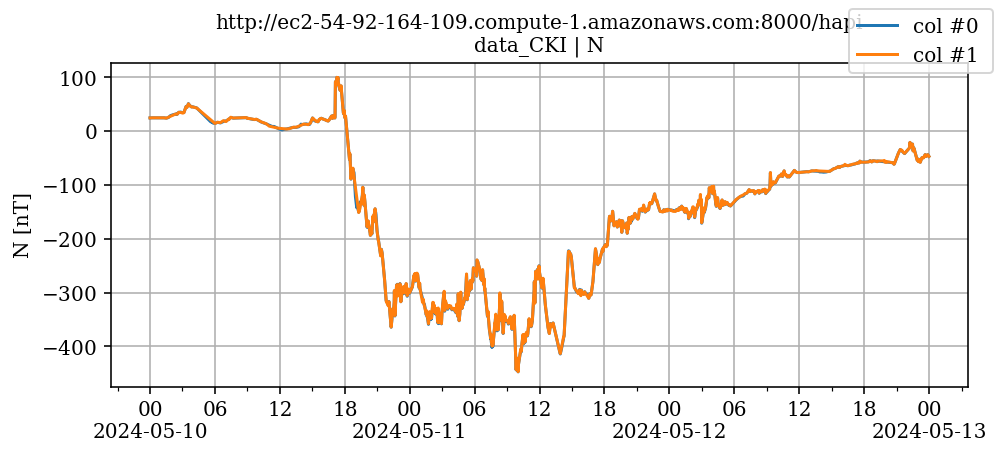

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK request successful'},
 'modificationDate': '2024-06-13T00:00:00Z',
 'x_customRequestOptions': [{'name': 'baseline',
   'description': 'Changing the baseline subtraction from the default',
   'type': 'string',
   'constraint': {'enum': ['system', 'yearly', 'none']},
   'default': 'system'},
  {'name': 'delta',
   'description': 'Changing the delta subtraction from the default',
   'type': 'string',
   'constraint': {'enum': ['system', 'none', 'start']},
   'default': 'system'}],
 'parameters': [{'length': 24,
   'name': 'Time',
   'type': 'isotime',
   'fill': None,
   'units': 'UTC'},
  {'name': 'N',
   'type': 'double',
   'units': 'nT',
   'fill': '0',
   'size': [2],
   'desc': 'N_nez, N_geo',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'startDate': '2020-01-01T00:00Z',
 'stopDate': '2024-06-12T00:00:00Z',
 'sampleStartDate': '2020-01-01T00:00Z',
 'sampleStopDate': '2020-02-01T00:00Z',
 'cadence': 'PT1M',

In [1]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'http://ec2-54-92-164-109.compute-1.amazonaws.com:8000/hapi'
dataset    = "data_CKI"
start      = '2024-05-10T00:00:00Z' # Start and stop times
stop       = '2024-05-13T00:00:00Z'
parameters = 'N'   # blank means all parameters

data, meta = hapi(server, dataset, parameters, start, stop)

hapiplot(data,meta)


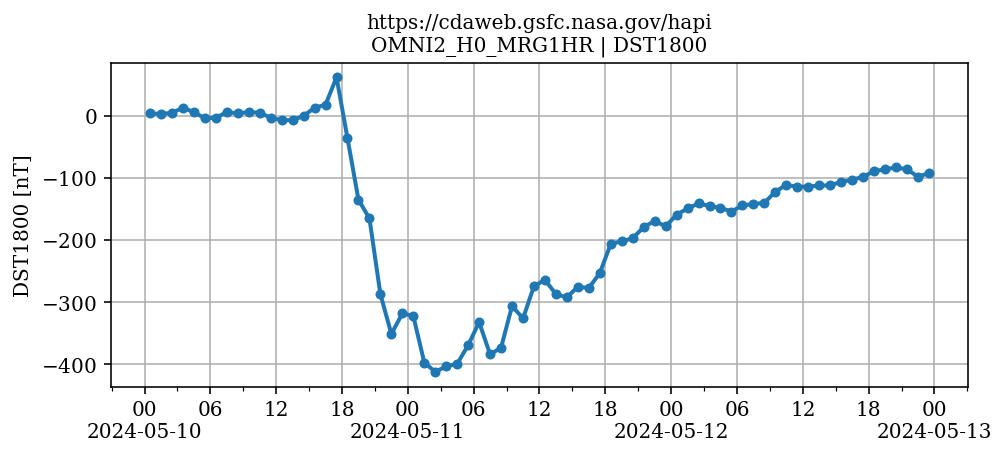

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'DST1800',
   'description': 'Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2017/001-2023/181), Quick-look Dst (2023/182-2024/102), from WDC Kyoto',
   'units': 'nT',
   'type': 'integer',
   'fill': '99999',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'startDate': '1963-01-01T00:00:00Z',
 'stopDate': '2024-06-05T14:00:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'OMNI2_H0_MRG1HR',
 'x_parameters': 'DST1800',
 'x_time.min': '2024-05-10T00:00:00Z',
 'x_time.max': '2024-05-13T00:00:00Z',
 'x_requestDate': '2024-06-13T05:16:12',
 'x_cacheDir': '/tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi',
 'x_downloadTime': 0.5502

In [2]:
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'OMNI2_H0_MRG1HR'
parameters = 'DST1800'
data, meta = hapi(server, dataset, parameters, start, stop)
hapiplot(data,meta)


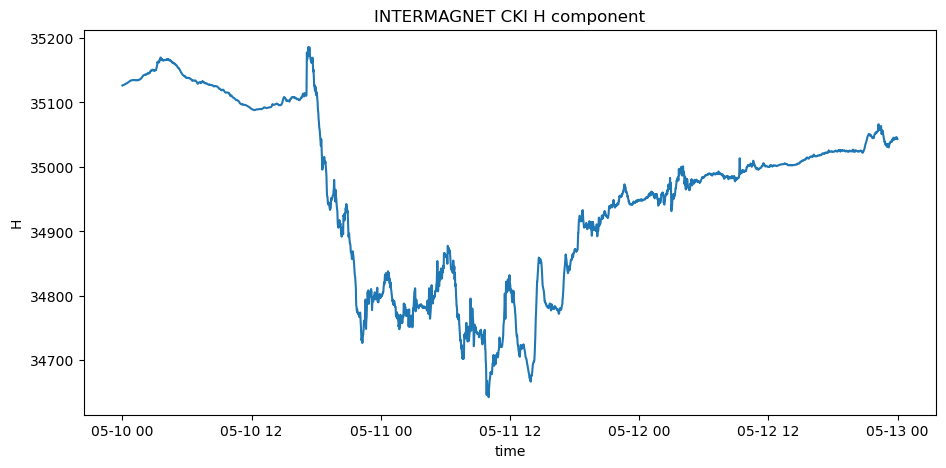

In [6]:
from hapiclient import hapitime2datetime
import matplotlib.pyplot as plt

server = "https://imag-data.bgs.ac.uk/GIN_V1/hapi"
dataset = "cki/best-avail/PT1M/hdzf"
parameters="Field_Vector"
data, meta = hapi(server, dataset, parameters, start, stop)

# Extract time and one elmeent of array to plot manually:
dateTimes = hapitime2datetime(data['Time'])
d = data['Field_Vector'][:,0]

fig = plt.figure(figsize=(11,5))  # specify (width,height) in inches
ax = fig.add_subplot(1,1,1)
ax.plot(dateTimes, d)
ax.set(xlabel='time', ylabel='H', title='INTERMAGNET CKI H component')
plt.show()